In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import cv2
import time

# Question 1

<p>Degradation function: </p>
$$ H(u, v) = \frac{T}{\pi (ua + vb)} \sin[ \pi (ua + vb) ]e^{-j \pi (ua + vb)} $$

In [2]:
def rgb2gray(rgb):
    """Convert an image to grayscale using standard ratios for r,g,b"""
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [3]:
img = rgb2gray(np.array(cv2.imread("DIP.png")))

In [4]:
img = np.pad(img, pad_width=1)

In [5]:
F = np.fft.fftshift(np.fft.fft2(img)) #shift zero-frequency component to the mean 

In [6]:
a, b, T = 0.05, 0.02, 1

In [7]:
def gauss_noise(data, v, u=0):
    """Adds in Gaussian noise to an image (data) based on value of mu and sigma"""
    x = np.abs(data)*255/np.abs(data).max()
    noisy_data = x + np.random.normal(u, v**0.5, data.shape)
    return noisy_data

In [8]:
def degradation(a=a, b=b, T=1, fft_img=F):
    """
    Returns the output of a sample degradation function of motion blur in the frequency domain
    @Param:
    1. a - linear motion rate in the horizontal direction (spatial domain)
    2. b - linear motion rate in the vertical direction   (spatial domain)
    3. u - mean
    4. T - Motion blur parameter (time/spatial integration)
    5. fft_img - FFT centered image
    """
    height, width = fft_img.shape
    output = lambda u, v: T if (u*a + v*b == 0) else T * np.exp(-1j*np.pi \
                                * (u*a + v*b)) * np.sin(np.pi * (u*a + v*b))/(np.pi * (u*a + v*b))

    H = np.zeros(shape=(height, width), dtype=np.complex128)
    
    for u in range(height):
        for v in range(width):
            H[u, v] = output(u, v)
    return H

In [9]:
H = degradation()

In [10]:
output_centered_fft = F*H
G = np.fft.ifft2(np.fft.ifftshift(output_centered_fft))

In [11]:
noisy_1 = gauss_noise(np.abs(G), v=0.0065) #noise level set to 'lightly corrupted'
noisy_2 = gauss_noise(np.abs(G), v=65) #noise level set to 'midly corrupted'
noisy_3 = gauss_noise(np.abs(G), v=650) #noise level set to 'heavily corrupted'

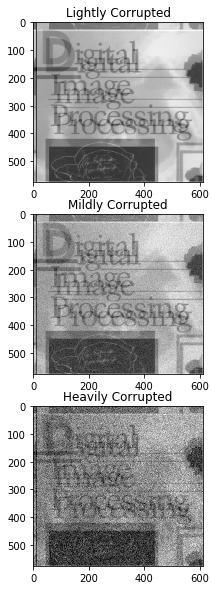

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10,10))
ax1.imshow(np.abs(noisy_1), "gray"), ax1.set_title("Lightly Corrupted")
ax2.imshow(np.abs(noisy_2), "gray"), ax2.set_title("Mildly Corrupted")
ax3.imshow(np.abs(noisy_3), "gray"), ax3.set_title("Heavily Corrupted")
plt.show()